## 내/외부인 비율 파이차트

### 축제 방문객 내/외부인 분포 파악

In [3]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../data/raw_data'
df = pd.DataFrame()
address = pd.read_csv("../data/address_with_lon_lat_final.csv")
mooju = set(list(address[address['시군구명'] == '무주군']['행정동코드']))

# 전처리코드는 모두 여기에
def preprocess(df):
    # dest_hdong_cd 값이 축제가 열리는 곳인 무주군 데이터만 필터링
    filtered_df = df[df['dest_hdong_cd'].isin(mooju)]

    #filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    """#filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    df = pd.merge(df, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='dest_hdong_cd', right_on='행정동코드', how='left')

    # 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
    df = df.drop(columns=['행정동코드'])

    filtered_df = df[df['시군구명'] == '무주군']

    filtered_df = filtered_df.drop(columns=['시도명', '시군구명'])"""

    # 타 지역에서 온 데이터만 필터링
    #filtered_df = filtered_df[filtered_df['origin_hdong_cd'] != filtered_df['dest_hdong_cd']]
    #filtered_df = filtered_df[~filtered_df['origin_hdong_cd'].isin(mooju)]

    # 체류목적이 3(쇼핑여가), 4(기타), 5(여행) 인경우만 
    filtered_df = filtered_df[(filtered_df['dest_purpose'] == 3) | 
                          (filtered_df['dest_purpose'] == 4) | 
                          (filtered_df['dest_purpose'] == 5)]

    return filtered_df

# 'od'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('od'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # 전처리
                filtered_data = preprocess(csv_data)

                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 기존데이터프레임에 포함합니다.")
                df = pd.concat([df, globals()[f'df_{mmdd_str}']])

데이터프레임 df_0901가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0902가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0903가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0904가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0905가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0906가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0907가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0908가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0909가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0910가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0911가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0912가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0913가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0914가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0915가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0916가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0917가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0918가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0919가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0920가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0921가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0922가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0923가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0924가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0925가 생성되었고, 기존데이터프레임에 포함합니다.


In [74]:
festival_df = df[(df['date'] >= 20230902) & (df['date'] <= 20230910)]
festival_df_grouped = festival_df.groupby('date')['od_cnts'].sum().reset_index()

# 'date'와 'origin_hdong_cd'을 기준으로 'od_cnts'를 집계
festival_df_grouped_2 = festival_df.groupby(['origin_hdong_cd'])['od_cnts'].sum().reset_index()

# df_1의 'origin_hdong_cd'와 df_2의 '행정동코드'를 기준으로 병합
festival_df_grouped_2 = pd.merge(festival_df_grouped_2, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='origin_hdong_cd', right_on='행정동코드', how='left')

# 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
festival_df_grouped_2 = festival_df_grouped_2.drop(columns=['행정동코드'])

festival_df_grouped_2.drop_duplicates(inplace=True)

In [75]:
# '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
festival_df_grouped_sido = festival_df_grouped_2.groupby('시도명')['od_cnts'].sum().reset_index()

# 'od_cnts' 기준으로 내림차순 정렬
festival_df_grouped_sido = festival_df_grouped_sido.sort_values(by='od_cnts', ascending=False)

In [76]:
# '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
junbok_filtered = festival_df_grouped_2[festival_df_grouped_2['시도명'] == '전라북도']
festival_df_grouped_junbok = junbok_filtered.groupby('시군구명')['od_cnts'].sum().reset_index()

# 'od_cnts' 기준으로 내림차순 정렬
festival_df_grouped_junbok = festival_df_grouped_junbok.sort_values(by='od_cnts', ascending=False)

In [77]:
# 내부인(첫 번째 행)과 외부인(나머지 행)의 데이터프레임 생성
internal_df = festival_df_grouped_junbok.iloc[[0]].copy()  # .copy() 사용하여 SettingWithCopyWarning 방지
internal_df['시군구명'] = '외부인'

external_sum = festival_df_grouped_junbok.iloc[1:]['od_cnts'].sum()
external_df = pd.DataFrame([['내부인', external_sum]], columns=['시군구명', 'od_cnts'])

# 최종 데이터프레임 합치기
in_out_df = pd.concat([internal_df, external_df]).reset_index(drop=True)
in_out_df.columns = ['내/외부인', 'od_cnts']

in_out_df

,내/외부인,od_cnts
0,외부인,35542
1,내부인,8863


### 외부인 세부분포 파악

In [78]:
#festival_df_grouped_sido = festival_df_grouped_sido[1:]
festival_df_grouped_junbok = festival_df_grouped_junbok.iloc[1:]

In [79]:
map_filtered = pd.DataFrame()
for i in festival_df_grouped_sido['시도명']:
    # '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
    junbok_filtered = festival_df_grouped_2[festival_df_grouped_2['시도명'] == i]
    if i == '세종특별자치시':
        festival_df_grouped_junbok = junbok_filtered.groupby('시도명')['od_cnts'].sum().reset_index()
    else:
        festival_df_grouped_junbok = junbok_filtered.groupby('시군구명')['od_cnts'].sum().reset_index()
    festival_df_grouped_junbok['시도명'] = i
    # 'od_cnts' 기준으로 내림차순 정렬
    festival_df_grouped_junbok = festival_df_grouped_junbok.sort_values(by='od_cnts', ascending=False)

    map_filtered = pd.concat([map_filtered, festival_df_grouped_junbok])
    # 결과 출력
    print(i)
    print(festival_df_grouped_junbok)
    print()

#map_filtered.drop(columns=['시도명'], inplace=True)


전라북도
       시군구명  od_cnts   시도명
4       무주군    35542  전라북도
11  전주시 덕진구     2834  전라북도
12  전주시 완산구     1561  전라북도
10      장수군     1139  전라북도
8       익산시      772  전라북도
14      진안군      704  전라북도
1       군산시      592  전라북도
7       완주군      488  전라북도
3       남원시      259  전라북도
2       김제시      141  전라북도
13      정읍시      123  전라북도
9       임실군      109  전라북도
6       순창군       66  전라북도
0       고창군       54  전라북도
5       부안군       21  전라북도

대전광역시
  시군구명  od_cnts    시도명
2   서구     1813  대전광역시
3  유성구     1379  대전광역시
1   동구     1207  대전광역시
4   중구      776  대전광역시
0  대덕구      562  대전광역시

경상남도
         시군구명  od_cnts   시도명
1         거창군      658  경상남도
9         진주시      560  경상남도
16        통영시      384  경상남도
0         거제시      374  경상남도
19        함양군      323  경상남도
3         김해시      179  경상남도
5         사천시      131  경상남도
6         산청군      121  경상남도
14    창원시 의창구      115  경상남도
13    창원시 성산구       81  경상남도
11  창원시 마산합포구       70  경상남도
20        합천군       49  경상남도
18        함안군       43  경상남도
4     

In [80]:
od_cnts_sum_by_sido = map_filtered.groupby('시도명')['od_cnts'].sum().reset_index().sort_values(by='od_cnts', ascending=False)

od_cnts_sum_by_sido

,시도명,od_cnts
13,전라북도,44405
6,대전광역시,5737
2,경상남도,3235
14,충청남도,2413
15,충청북도,2314
1,경기도,1832
5,대구광역시,1686
3,경상북도,1666
4,광주광역시,1092
9,세종특별자치시,999


In [91]:
# 대전광역시, 충청남도, 세종특별자치시를 '충남/대전 지역'으로 묶기
od_cnts_sum_by_sido['시도명'] = od_cnts_sum_by_sido['시도명'].replace({
    '대전광역시': '충남/대전 지역', 
    '충청남도': '충남/대전 지역', 
    '세종특별자치시': '충남/대전 지역'
})

# 시도명별 od_cnts 합계 계산
od_cnts_sum_grouped = od_cnts_sum_by_sido.groupby('시도명')['od_cnts'].sum().reset_index()

# od_cnts 값이 2000 미만인 항목을 '기타'로 묶기
od_cnts_sum_grouped['시도명'] = od_cnts_sum_grouped['시도명'].where(od_cnts_sum_grouped['od_cnts'] >= 2000, '기타')


# 시도명별 od_cnts 합계 계산
od_cnts_sum_grouped = od_cnts_sum_grouped.groupby('시도명')['od_cnts'].sum().reset_index()
new_data = pd.DataFrame({'시도명': ['전라북도 무주군 (개최지)'], 'od_cnts': [8863]})
od_cnts_sum_grouped = pd.concat([od_cnts_sum_grouped, new_data]).sort_values(by='od_cnts', ascending=False)
od_cnts_sum_grouped

,시도명,od_cnts
2,전라북도,44405
3,충남/대전 지역,9149
0,전라북도 무주군 (개최지),8863
1,기타,8393
0,경상남도,3235
4,충청북도,2314


### 내/외부인 비율 시각화

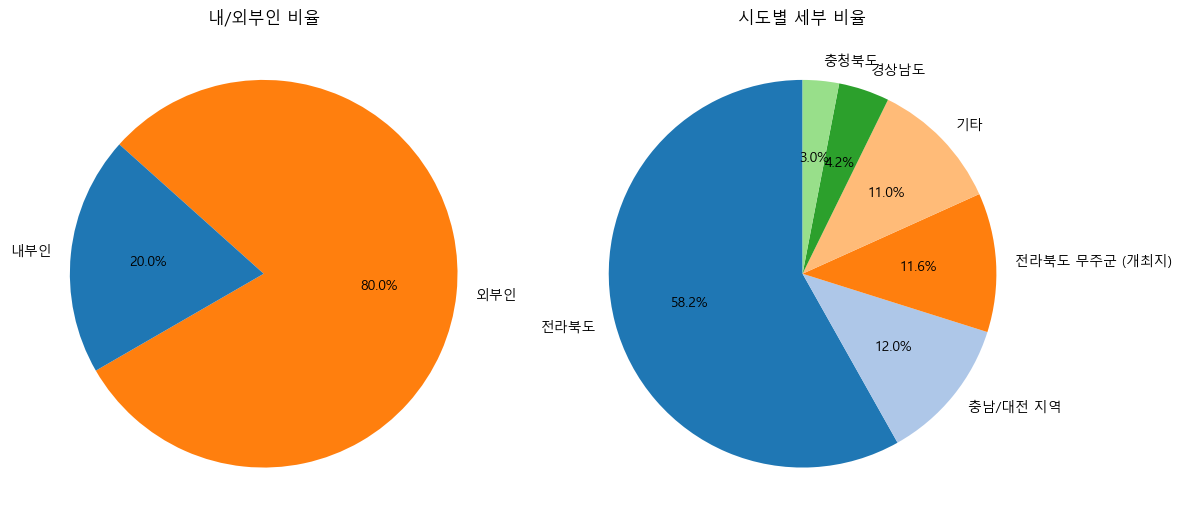

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽 그래프: in_out_df (30도 회전)
ax1.pie(in_out_df['od_cnts'], 
        labels=in_out_df['내/외부인'], 
        autopct='%1.1f%%', 
        startangle=210, 
        colors=['#ff7f0e', '#1f77b4'])  # 내부인: 주황색, 외부인: 파란색
ax1.set_title('내/외부인 비율')

# 오른쪽 그래프: od_cnts_sum_grouped
ax2.pie(od_cnts_sum_grouped['od_cnts'], labels=od_cnts_sum_grouped['시도명'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
ax2.set_title('시도별 세부 비율')


# 그래프 표시
plt.tight_layout()
plt.show()


In [ ]:
map_filtered = pd.DataFrame()
for i in festival_df_grouped_sido['시도명']:
    # '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
    junbok_filtered = festival_df_grouped_2[festival_df_grouped_2['시도명'] == i]
    if i == '세종특별자치시':
        festival_df_grouped_junbok = junbok_filtered.groupby('시도명')['od_cnts'].sum().reset_index()
    else:
        festival_df_grouped_junbok = junbok_filtered.groupby('시군구명')['od_cnts'].sum().reset_index()
    festival_df_grouped_junbok['시도명'] = i
    # 'od_cnts' 기준으로 내림차순 정렬
    festival_df_grouped_junbok = festival_df_grouped_junbok.sort_values(by='od_cnts', ascending=False)

    map_filtered = pd.concat([map_filtered, festival_df_grouped_junbok[festival_df_grouped_junbok['od_cnts'] >= 500]])
    # 결과 출력
    print(i)
    print(festival_df_grouped_junbok[festival_df_grouped_junbok['od_cnts'] >= 500])
    print()

#map_filtered.drop(columns=['시도명'], inplace=True)
